In [1]:
%store -r feature_importances_lights_good
%store -r feature_importances_lights_v2v_good
%store -r feature_importances_signs_good
%store -r feature_importances_signs_v2v_good

%store -r df_sign2_1
%store -r df_sign2_v2v_1
%store -r df_light2_1
%store -r df_light2_v2v_1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
print(np.shape(feature_importances_lights_good), np.shape(feature_importances_lights_v2v_good), np.shape(feature_importances_signs_good), np.shape(feature_importances_signs_v2v_good))

(5, 750, 3) (2, 750, 3) (3, 750, 3) (3, 750, 3)


(179250, 5)
Index(['CoGAY', 'SpeedX', 'SpeedY', 'relative_dist_x', 'relative_accel_x'], dtype='object')


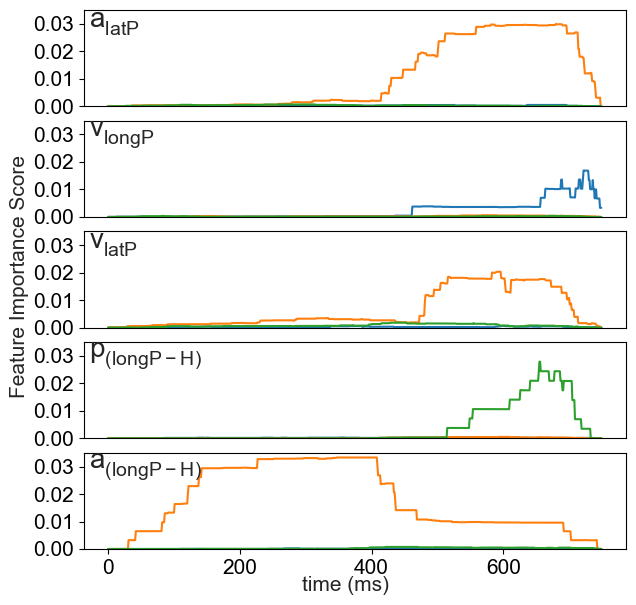

(179250, 2)
Index(['Brake', 'relative_dist_x'], dtype='object')


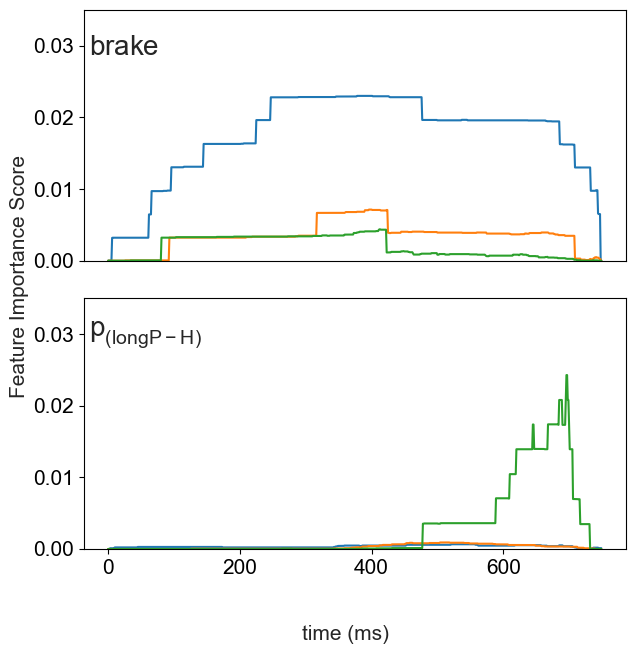

(167250, 3)
Index(['CoGAX', 'SpeedX', 'relative_accel_x'], dtype='object')


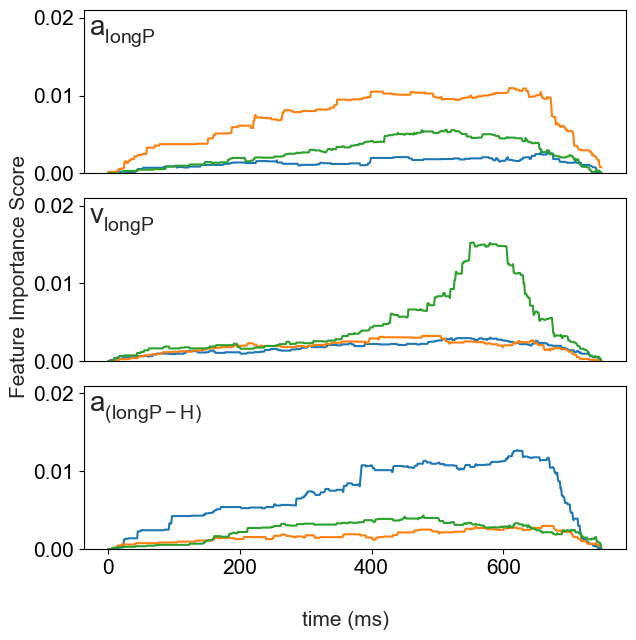

(167250, 3)
Index(['SpeedX', 'Brake', 'Gas'], dtype='object')


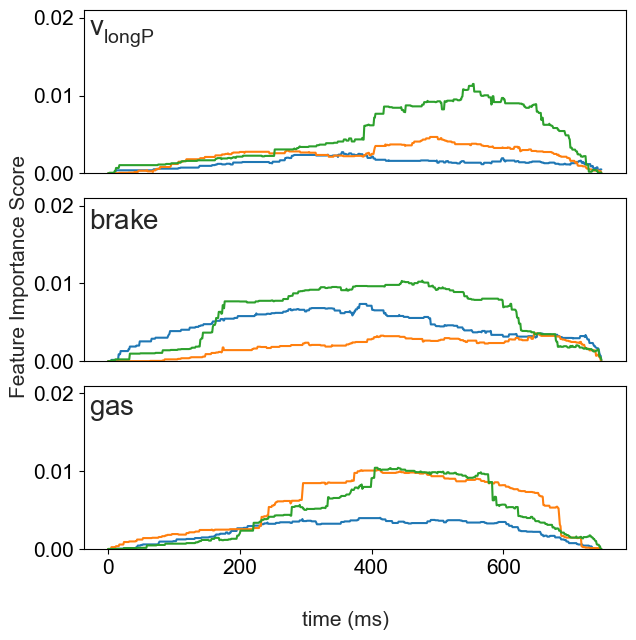

In [18]:
for j in ['lights', 'lights_v2v', 'signs', 'signs_v2v']:
    plt.rcParams.update(plt.rcParamsDefault)
    if j == 'lights':
        data = df_light2_1
        feature_importance = feature_importances_lights_good 
        vars = ['$a_{latP}$', '$v_{longP}$', '$v_{latP}$', '$p_{(longP-H)}$', '$a_{(longP-H)}$']
        ylim = 0.035
        name = "lights.png"
        w = 9
        h = 10
        s = 0.05
        
    elif j == 'lights_v2v':
        data = df_light2_v2v_1
        feature_importance = feature_importances_lights_v2v_good
        vars = ['$brake$', '$p_{(longP-H)}$']
        name = "lights_v2v.png"
        ylim=0.035
        w = 9
        h = 5
        s = -0.02
        
    elif j == 'signs':
        data = df_sign2_1
        feature_importance = feature_importances_signs_good
        vars = ['$a_{longP}$', '$v_{longP}$', '$a_{(longP-H)}$']
        name = "sign.png"
        ylim = 0.021
        w = 9
        h = 6
        s = 0
    elif j == 'signs_v2v':
        data = df_sign2_v2v_1
        feature_importance = feature_importances_signs_v2v_good
        vars = ['$v_{longP}$', '$brake$', '$gas$']
        ylim = 0.021
        name = "sign_v2v.png"
        w = 9
        h = 6
        s = 0
    
    n = len(data.columns)
    
    params = {'mathtext.default': 'regular' }
    plt.rcParams.update({'font.size': 15})
            
    plt.rcParams.update(params)
    plt.rcParams['figure.figsize'] = w, h
    
    print(np.shape(data))
    print(data.columns)
    
    
    fig, ax = plt.subplots(n, sharex=True, sharey=True, figsize=(7,7))
    
    # plt.rcParams.update({'font.size': 12})
    # plt.rcParams['font.family'] = 'serif'
    plt.style.use('seaborn-v0_8-white')
    plt.legend(["mean", "std", "slope"])
    plt.yticks(np.arange(0, ylim, step=0.01))
    
    for i in range(len(data.columns)):
        ax[i].set_ylim(0, 750)
        ax[i].set_ylim(0, ylim)
        ax[i].plot(feature_importance[i])
        # ax[i].legend(["mean", "std", "slope"], loc='upper right')

        if i < n-1:
            ax[i].tick_params(axis='x', which='both', bottom=False)
    
    for i, col_title in enumerate(vars):
        params = {'mathtext.default': 'regular'}          
        plt.rcParams.update(params)
        fig.text(0.01, 0.85, col_title, va='center', ha='left', fontsize=20, transform=ax[i].transAxes)  # Adjust fontsize and position as needed
        
    # Set common y label
    fig.text(0.02, 0.5, 'Feature Importance Score', va='center', rotation='vertical', fontsize=15)
    # # Set common x label
    fig.text(0.5, s, 'time (ms)', ha='center', fontsize=15)
    # fig.legend(["mean", "std", "slope"], loc='center right', bbox_to_anchor=(1.05, 0.5, 0, 0), fontsize=14)
    
    plt.subplots_adjust(hspace=0.15)
    
    plt.savefig(name, bbox_inches='tight')
    plt.show()

